# Data Cleaning

Importing useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Loading in the data

In [2]:
df = pd.read_csv('../input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv')
print(df.shape)
df.head()

(4572257, 8)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
bitcoin_df = df.copy() # making a copy of the dataset to work with

In [4]:
time_col = pd.to_datetime(bitcoin_df['Timestamp'], unit='s') # converting the 'Timestamp' column to 
                                                             # datetime object

bitcoin_df.drop('Timestamp', axis=1, inplace=True) # drops the 'Timestamp' column
bitcoin_df['Timestamp'] = time_col # creates a new 'Timestamp' column with datetime dtype
bitcoin_df.set_index('Timestamp', inplace=True) # makes 'Timestamp' the index

bitcoin_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
missing_val_mask = bitcoin_df.isnull() # creating a dataframe with boolean values indicating the presence of 
                                       # missing value
missing_val_mask.sum()

Open                 1241716
High                 1241716
Low                  1241716
Close                1241716
Volume_(BTC)         1241716
Volume_(Currency)    1241716
Weighted_Price       1241716
dtype: int64

Let's check if all columns have Nan values for each row with any Nan value. 

In [6]:
missing_val_mask.sum(axis=1).sum() == len(bitcoin_df.columns) * missing_val_mask.sum().loc['Open']

True

Confirmed!

In [7]:
n_missing_val = missing_val_mask.sum().loc['Open'] # number of rows with missing values
print('There are {} rows with missing values which make up {}% of the total number of rows'.format( \
                                            n_missing_val, round(100*n_missing_val / bitcoin_df.shape[0], 3)))

There are 1241716 rows with missing values which make up 27.158% of the total number of rows


In [8]:
# creating a dataframe that contains only rows with missing values
missing_val_df = bitcoin_df[missing_val_mask.sum(axis=1) == 7].copy()

# asserting that the number of rows in 'missing_val_df' is same as the number of rows with missing values in 'df'
assert missing_val_df.shape[0] == n_missing_val 

In [9]:
# creating a 'date' column that contains only the date
missing_val_df['date'] = pd.Series(missing_val_df.index).apply(lambda x: x.date()).values
missing_val_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
Timestamp,,,,,,,,
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
2011-12-31 07:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31


Let's check the duration of Nan values per day in minutes

In [10]:
daily_Nan_minute = missing_val_df.groupby('date').apply(lambda x: x.shape[0])

In [11]:
assert daily_Nan_minute.sum() == n_missing_val

In [12]:
print('a day has {} minutes'.format(60*24))
print('maximum duration of Nan values in minute is {}mins which is {}% of the day'.format( \
                daily_Nan_minute.max(), round(100*daily_Nan_minute.max() / (60*24), 3)))
print('minimum duration of Nan values in minute is {}mins which is {}% of the day'.format( \
                daily_Nan_minute.min(), round(100*daily_Nan_minute.min() / (60*24), 3)))

a day has 1440 minutes
maximum duration of Nan values in minute is 1439mins which is 99.931% of the day
minimum duration of Nan values in minute is 1mins which is 0.069% of the day


In [13]:
missing_val_df.tail(1) # checking the last time with Nan value

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
Timestamp,,,,,,,,
2020-09-13 13:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-13


In [14]:
print('1st quartile of timestamp with Nan value is {}'.format(missing_val_df.index[len(missing_val_df)//4]))
print('median of timestamp with Nan value is {}'.format(missing_val_df.index[len(missing_val_df)//2]))
print('3rd quartile of timestamp with Nan value is {}'.format(missing_val_df.index[3*(len(missing_val_df)//4)]))

1st quartile of timestamp with Nan value is 2012-08-08 22:52:00
median of timestamp with Nan value is 2013-05-18 14:39:00
3rd quartile of timestamp with Nan value is 2015-08-23 20:01:00


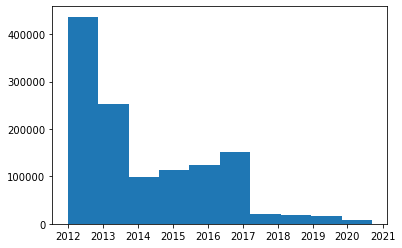

In [15]:
hist = plt.hist(missing_val_df.index) # checking the distribution of the Nan values

So we see that the Nan values are skewed to the left. Nan values are heavily present in past years than earlier years.

### Let's see the reason for the missing values as stated by Zielak the provider of the dataset so we know how to handle them.

> *CSV files for select bitcoin exchanges for the time period of Jan 2012 to September 2020, with minute to minute updates of OHLC (Open, High, Low, Close), Volume in BTC and indicated currency, and weighted bitcoin price. Timestamps are in Unix time. **TIMESTAMPS WITHOUT ANY TRADES OR ACTIVITY HAVE THEIR DATA FIELDS FILLED WITH NANS**...*

### Zielak also told us about jumps in timestamps and here is the reason:
> ***...IF A TIMESTAMP IS MISSING, OR IF THERE ARE JUMPS, THIS MAY BE BECAUSE THE EXCHANGE (OR ITS API) WAS DOWN, THE EXCHANGE (OR ITS API) DID NOT EXIST, OR SOME OTHER UNFORESEEN TECHNICAL ERROR IN THE DATA REPORTING OR GATHERING***. *All effort has been made to deduplicate entries and verify the contents are correct and complete to the best of my ability, but obviously trust at your own risk.*

So, let;s check for time jumps and contraction. Jump if any of the sampling rate is greater than a minute and contraction if it is less than a minute.

In [16]:
bitcoin_df['time_col'] = bitcoin_df.index
# takeing the first order difference to get the duration of Nan values

time_jump = (bitcoin_df['time_col'] - bitcoin_df['time_col'].shift()).dropna() 
delta_time = time_jump.apply(lambda x: x.total_seconds()) # converts the duration to seconds

delta_time.head()

Timestamp
2011-12-31 07:53:00    60.0
2011-12-31 07:54:00    60.0
2011-12-31 07:55:00    60.0
2011-12-31 07:56:00    60.0
2011-12-31 07:57:00    60.0
Name: time_col, dtype: float64

In [17]:
assert delta_time.shape[0] + 1 == bitcoin_df.shape[0] # confirming the number of rows

In [18]:
print('There is {} time jump'.format((delta_time > 60).sum()))
print('There is {} time contraction'.format((delta_time < 60).sum()))

There is 1 time jump
There is 0 time contraction


So there is no time contraction, let's now find where exactly the time jump is.

In [19]:
jump_duration = delta_time[delta_time > 60].values[0]
print('time jump duration is {} days'.format(round(jump_duration/(3600*24), 3)))

time jump duration is 4.495 days


In [20]:
ind_of_time_jump = delta_time.index.get_loc(delta_time[delta_time > 60].index[0])
bitcoin_df.iloc[ind_of_time_jump: ind_of_time_jump+2]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time_col
Timestamp,,,,,,,,
2015-01-05 09:12:00,276.80,276.8,276.80,276.8,0.100000,27.680000,276.800000,2015-01-05 09:12:00
2015-01-09 21:05:00,272.45,305.0,272.45,291.1,175.837078,50502.066285,287.209426,2015-01-09 21:05:00


In [21]:
24*60*4 + 30

5790

Although, there are more than one reasons for jumps in 'Timestamps' as stated by Zielak, one of worth noting is that "it may be the exchange or its API was down or didn't exist. A jump of approximately 4.5 days was observed which is 5,790mins (5,790 jumps). This jump is huge and we can conclude that it may not be due to error in data gathering rather, it may be due to a downtime in API or exchanges that don't exist. This is a strong reasoning and we will decide to **NOT** impute the jumps in time because we may be too biased if we impute such a great jump.

Resampling and smoothing before feeding the dataset to a model would cater for the effect of the jumps.

Let's check if there is any duplicate in 'Timestamp' values

In [22]:
len(bitcoin_df['time_col'].unique()) == bitcoin_df.shape[0]

True

So, we conclude that there are no duplicates in 'Timestamp' values!

Let's check the total span of the dataset.

In [23]:
print('the dataset spans for {}'.format(bitcoin_df.index[-1] - bitcoin_df.index[0]))

the dataset spans for 3179 days 16:08:00


Let's now go back to the Nan values. this time, we will be handling them. since the cause of missingness is "No trading activity", it will be biased to use imputation methods like EMA or filling with a particular value since there was no trading activity in real sense.

There are two best ways to handle missing values of this nature:
1. By filling 'Volume_(BTC)', 'Volume_(Currency)', and 'Weighted_Price' columns with zeros since there was no trading activity. Then, we do forward fill for 'Close' column and fill 'Open', 'High', and 'Low' columns with the values of the 'Close' column to make it a constant (horizontal) line of that peroid of inactivity.
2. Dropping the rows with Nan values because in actual sense, there was no trade for those periods.

WE WILL USE EACH OF THE APPROACHES TO BUILD OUR MODEL AND SELECT THE ONE WITH BEST PERFORMANCE!

### Approach 1: Imputation

In [24]:
bitcoin_df_imputation1 = bitcoin_df.copy() # makes a copy of 'bitcoin_df'. 
# 'bitcoin_df_imputation1' signifies our first approach of imputing

bitcoin_df_imputation1['Close'].fillna(method='ffill', inplace=True) # forward fill for the 'Close' column

# imputing 'Volume_(BTC)', 'Volume_(Currency)', and 'Weighted_Price' with zeros
bitcoin_df_imputation1[['Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']] = \
bitcoin_df_imputation1[['Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']].fillna(0)
bitcoin_df_imputation1.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time_col
Timestamp,,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00
2011-12-31 07:53:00,NaN,NaN,NaN,4.39,0.000000,0.0,0.00,2011-12-31 07:53:00
2011-12-31 07:54:00,NaN,NaN,NaN,4.39,0.000000,0.0,0.00,2011-12-31 07:54:00
2011-12-31 07:55:00,NaN,NaN,NaN,4.39,0.000000,0.0,0.00,2011-12-31 07:55:00
2011-12-31 07:56:00,NaN,NaN,NaN,4.39,0.000000,0.0,0.00,2011-12-31 07:56:00


In [25]:
# copying the values of 'Close' column to three columns of 'Open', 'High', and 'Low' that would later 
#be used for imputation.
impute1_df = pd.DataFrame({'Open': bitcoin_df_imputation1['Close'], 'High': bitcoin_df_imputation1['Close'], \
                          'Low': bitcoin_df_imputation1['Close']})
impute1_df.head()

,Open,High,Low
Timestamp,,,
2011-12-31 07:52:00,4.39,4.39,4.39
2011-12-31 07:53:00,4.39,4.39,4.39
2011-12-31 07:54:00,4.39,4.39,4.39
2011-12-31 07:55:00,4.39,4.39,4.39
2011-12-31 07:56:00,4.39,4.39,4.39


In [26]:
# imputation
bitcoin_df_imputation1[['Open', 'High', 'Low']] = bitcoin_df_imputation1[['Open', 'High', 'Low']].fillna( \
                                                            impute1_df)
bitcoin_df_imputation1.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time_col
Timestamp,,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.000000,0.0,0.00,2011-12-31 07:53:00
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.000000,0.0,0.00,2011-12-31 07:54:00
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.000000,0.0,0.00,2011-12-31 07:55:00
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.000000,0.0,0.00,2011-12-31 07:56:00


In [27]:
print(bitcoin_df_imputation1.shape)
bitcoin_df_imputation1.isnull().sum()

(4572257, 8)


Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
time_col             0
dtype: int64

The 'Weighted_Price' column of 'df' doesn't have any value of zero, we will use this to further confirm that our imputation was done properly. 

In [28]:
(df['Weighted_Price'] == 0).sum() # checks the number of zero values in 'Weighted_Price' column of 'df'

0

In [29]:
assert (bitcoin_df_imputation1['Weighted_Price'] == 0).sum() == missing_val_mask['Open'].sum()

In [30]:
# making a list of all columns apart from 'time_col' column and'Open' column
cols = list(bitcoin_df_imputation1.columns[1:-1])

# creating the appropriate subplot indices for the cols to be used for making plots
ind = list(range(3, 9))

Let's create a function that would plot the cols and 'Open' with 'Timestamp' for a given dataframe

In [31]:
def plot_series_of_each_column(d_f, cols=cols):
    fig = plt.figure(figsize=(18, 8))
    for i, col in zip(ind, cols):
        a = fig.add_subplot(4, 2, i)
        plt.xlabel('year')
        plt.ylabel(col)
        plt.plot(d_f.index, d_f[col], '-')
        plt.grid()
    
    a = fig.add_subplot(4, 1, 1)
    plt.xlabel('year')
    plt.ylabel('Open')
    plt.plot(d_f.index, d_f['Open'], '-')
    plt.grid()

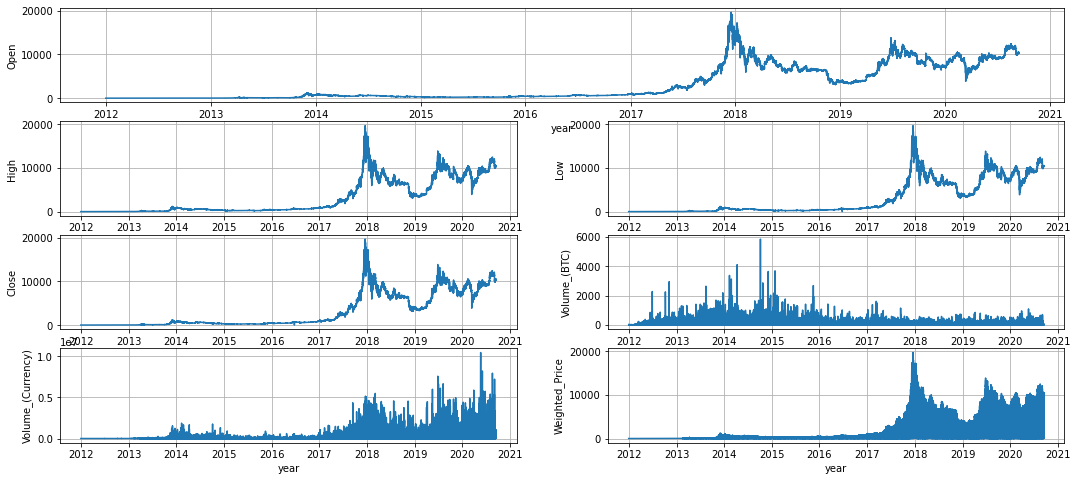

In [32]:
plot_series_of_each_column(bitcoin_df_imputation1)

Approach 2: dropping rows with Nan values

In [33]:
bitcoin_df_imputation2 = bitcoin_df.copy() # makes a copy of 'bitcoin_df'. 
# 'bitcoin_df_imputation2' signifies our second approach of dropping rows with Nan values.

In [34]:
bitcoin_df_imputation2.dropna(inplace=True)
print(bitcoin_df_imputation2.shape)
bitcoin_df_imputation2.isnull().sum()

(3330541, 8)


Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
time_col             0
dtype: int64

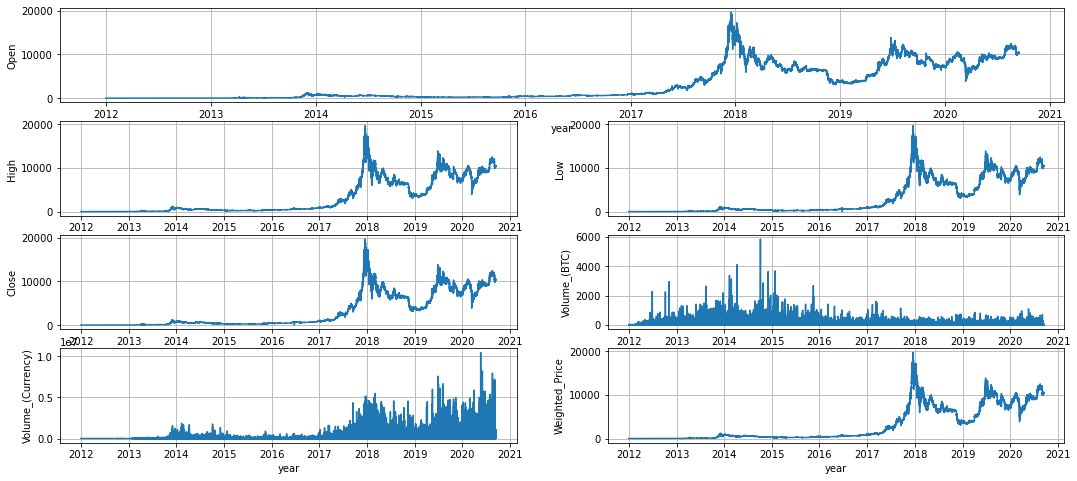

In [35]:
plot_series_of_each_column(bitcoin_df_imputation2)

# So, our next task is to build a model with each of these approaches (````bitcoin_df_imputation1```` and ````bitcoin_df_imputation2````) and then choose the model with best performance!

# Thank you.

# Resampling

### Henceforth, variable names ending with 1 signify the usage of the first imputation approach, while those ending with a 2 signify the usage of the second imputation approach.

In [36]:
# selecting the our working column for this notebook which is the 'Open' column
open_time_series1 = bitcoin_df_imputation1['Open']
open_time_series2 = bitcoin_df_imputation2['Open']

In [37]:
weekly_open_time_series1 = open_time_series1.resample('W').mean() # downsamples to a weekly timeframe
weekly_open_time_series2 = open_time_series2.resample('W').mean() # downsamples to a weekly timeframe

monthly_open_time_series1 = open_time_series1.resample('M').mean() # downsamples to a monthly timeframe
monthly_open_time_series2 = open_time_series2.resample('M').mean() # downsamples to a monthly timeframe

# let's confirm that there are no Nan values after downsampling.
assert weekly_open_time_series1.isnull().sum() == 0
assert weekly_open_time_series2.isnull().sum() == 0
assert monthly_open_time_series1.isnull().sum() == 0
assert monthly_open_time_series2.isnull().sum() == 0

In [38]:
print('open_time_seies1 has been downsampled from a minute timeframe of {}'.format(open_time_series1.shape[0]) + \
      ' observations to a weekly timeframe of {} observations'.format(weekly_open_time_series1.shape[0]))
print()
print('open_time_seies1 has been downsampled from a minute timeframe of {}'.format(open_time_series1.shape[0]) + \
      ' observations to a monthly timeframe of {} observations'.format(monthly_open_time_series1.shape[0]))
print()
print('open_time_seies2 has been downsampled from a minute timeframe of {}'.format(open_time_series1.shape[0]) + \
      ' observations to a weekly timeframe of {} observations'.format(weekly_open_time_series2.shape[0]))
print()
print('open_time_seies2 has been downsampled from a minute timeframe of {}'.format(open_time_series1.shape[0]) + \
      ' observations to a monthly timeframe of {} observations'.format(monthly_open_time_series2.shape[0]))

open_time_seies1 has been downsampled from a minute timeframe of 4572257 observations to a weekly timeframe of 456 observations

open_time_seies1 has been downsampled from a minute timeframe of 4572257 observations to a monthly timeframe of 106 observations

open_time_seies2 has been downsampled from a minute timeframe of 4572257 observations to a weekly timeframe of 456 observations

open_time_seies2 has been downsampled from a minute timeframe of 4572257 observations to a monthly timeframe of 106 observations


This makes sense because although, ````bitcoin_df_imputation1```` and ````bitcoin_df_imputation2```` have different number of observations, they still have the same span (total duration). Let's confirm that.

In [39]:
print("bitcoin_df_imputation1's number of observation is {}".format(bitcoin_df_imputation1.shape[0]))
print("bitcoin_df_imputation2's number of observation is {}".format(bitcoin_df_imputation2.shape[0]))

bitcoin_df_imputation1's number of observation is 4572257
bitcoin_df_imputation2's number of observation is 3330541


In [40]:
assert bitcoin_df_imputation1.index[-1] - bitcoin_df_imputation1.index[0] == bitcoin_df_imputation2.index[-1] - \
                                                                                bitcoin_df_imputation2.index[0]

# Smoothing

### Let's check if there is need to smoothing the series. First, we will create a function that takes a dictionary of series name/series pairs and plot all the series as a 2x2 subplots in a 18x8 figure object. The function assumes that we would be plotting 4 subplots.


In [41]:
def plot_univariate_time_series(series):
    fig = plt.figure(figsize=(18, 8))
    
    for series_label, ind in zip(series.keys(), range(1, len(series)+1)):
        a = fig.add_subplot(2, 2, ind)
        plt.plot(series[series_label].index, series[series_label], '--')
        plt.grid()
        plt.xlabel('years')
        plt.ylabel(series_label)


In [42]:
# initializing a dictionary of series name/series pairs to use as an argument to our plot_univariate_time_series
# function

series = {'weekly_open1': weekly_open_time_series1, 'monthly_open1': monthly_open_time_series1, \
         'weekly_open2': weekly_open_time_series2, 'monthly_open2': monthly_open_time_series2}

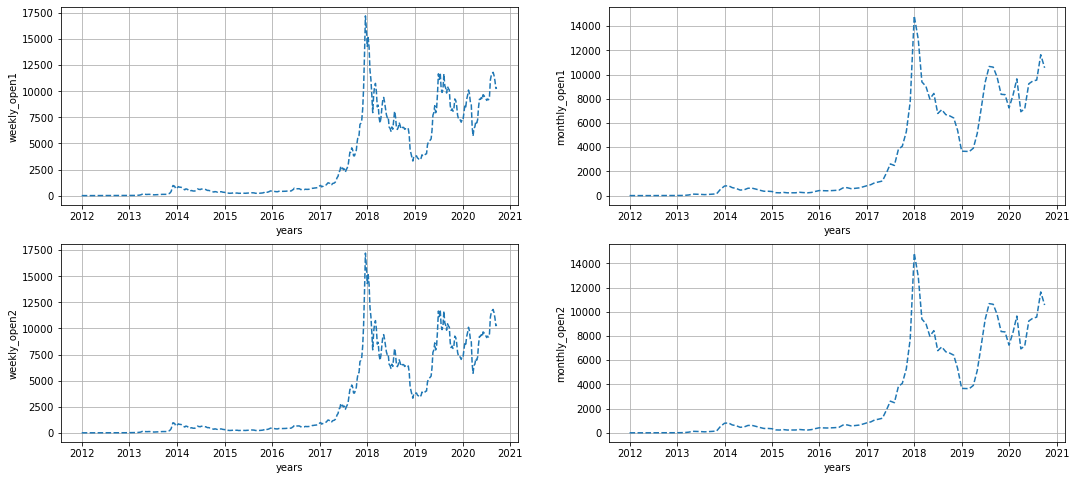

In [43]:
plot_univariate_time_series(series)

#### **The Plots above looks smooth and there maybe NO need for further smoothing as it may be too baised to further smoothen the series**